In [2]:
%%writefile testutility.py
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime 
import gc
import re

def read_yml_file(file_path):
    with open(file_path, 'r') as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            logging.error(exc)

def replacer(string, char):
    pattern = char + '{2,}'
    string = re.sub(pattern, char, string)
    return string

def col_validate(df, col_config):
  cols = df.columns
  cols = cols.str.strip()
  cols.str.replace("_", "")
  cols = list(map(lambda x: replacer(x, ' '), list(cols)))
  expected_col = list(map(lambda x: x.lower(),  col_config['columns']))
  cols.sort()
  expected_col.sort()
  if len(cols) == len(expected_col) and cols == expected_col:
    print("Column name and Column length Validation Passed!!")
    return 1
  else:
    print("Column name and Column length Validation Failed..")
    mismatched_columns_file = list(set(cols).difference(expected_col))
    print("Following File columns are not in the YAML file", mismatched_columns_file)
    missing_YAML_file = list(set(expected_col).difference(cols))
    print("Following YAML columns are not in the file uploaded", missing_YAML_file)
    logging.info(f'df columns: {cols}')
    logging.info(f'expected columns: {expected_col}')
    return 0

# Function to get the size of dataset
def humanbytes(B):
  'Return the given bytes as a human friendly KB, MB, GB, or TB string'
  B = float(B)
  KB = float(1024)
  MB = float(KB ** 2) # 1,048,576
  GB = float(KB ** 3) # 1,073,741,824
  TB = float(KB ** 4) # 1,099,511,627,776

  if B < KB:
    return '{0} {1}'.format(B,'Bytes' if 0 == B > 1 else 'Byte')
  elif KB <= B < MB:
    return '{0:.2f} KB'.format(B/KB)
  elif MB <= B < GB:
    return '{0:.2f} MB'.format(B/MB)
  elif GB <= B < TB:
    return '{0:.2f} GB'.format(B/GB)
  elif TB <= B:
    return '{0:.2f} TB'.format(B/TB)

Overwriting testutility.py


In [3]:
%%writefile file.yaml
columns: 
  - annotation
  - content
dataset_name: resumes
dtypes: 
  annotation: list
  content: str
file_name: Resume
file_type: json
skip_leading_rows: 1
table_name: resumes

Overwriting file.yaml


In [4]:
import testutility as util

# Read config file
col_config = util.read_yml_file("file.yaml")
col_config

{'columns': ['annotation', 'content'],
 'dataset_name': 'resumes',
 'dtypes': {'annotation': 'list', 'content': 'str'},
 'file_name': 'Resume',
 'file_type': 'json',
 'skip_leading_rows': 1,
 'table_name': 'resumes'}

In [5]:
# Read the file using yaml config file
file_type = col_config['file_type']
source_file = col_config['file_name'] + f'.{file_type}'
source_file

'Resume.json'

In [6]:
import pandas as pd

df = pd.read_json('Resume.json', lines=True)
df.to_csv('dataframe.csv', index = None)
df.head()

,content,annotation
0,Govardhana K\nSenior Software Engineer\n\nBeng...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli\nTest Analyst at Oracle, Hy...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria\nData Analyst Intern - Oracle ...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin\nAssociate Consultant - State ...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari\njava developer\n\nPune, Maha...","[{'label': ['Skills'], 'points': [{'start': 18..."


In [7]:
# Getting the size of the dataset
size = df.memory_usage(deep=True).sum()
file_size = util.humanbytes(size)
print(file_size)

1.41 MB


In [8]:
# Checking the shape of dataframe
df.shape

(200, 2)

In [9]:
# Checking no. of NA Values
df.isnull().sum()

content       0
annotation    0
dtype: int64

In [10]:
df['annotation'][0]

[{'label': ['Companies worked at'],
  'points': [{'start': 1749, 'end': 1754, 'text': 'Oracle'}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1696, 'end': 1701, 'text': 'Oracle'}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1417, 'end': 1422, 'text': 'Oracle'}]},
 {'label': ['Skills'],
  'points': [{'start': 1356,
    'end': 1792,
    'text': 'Languages: Core Java, Go Lang, Data Structures & Algorithms, Oracle\nPL-SQL programming, Sales Force with APEX.\nTools: RADTool, Jdeveloper, NetBeans, Eclipse, SQL developer,\nPL/SQL Developer, WinSCP, Putty\nWeb Technologies: JavaScript, XML, HTML, Webservice\n\nOperating Systems: Linux, Windows\nVersion control system SVN & Git-Hub\nDatabases: Oracle\nMiddleware: Web logic, OC4J\nProduct FLEXCUBE: Oracle FLEXCUBE Versions 10.x, 11.x and 12.x'}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1209, 'end': 1214, 'text': 'Oracle'}]},
 {'label': ['Skills'],
  'points': [{'start': 1136,
    'end': 1247,


In [11]:
df['content'][0]

'Govardhana K\nSenior Software Engineer\n\nBengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/\nb2de315d95905b68\n\nTotal IT experience 5 Years 6 Months\nCloud Lending Solutions INC 4 Month • Salesforce Developer\nOracle 5 Years 2 Month • Core Java Developer\nLanguages Core Java, Go Lang\nOracle PL-SQL programming,\nSales Force Developer with APEX.\n\nDesignations & Promotions\n\nWilling to relocate: Anywhere\n\nWORK EXPERIENCE\n\nSenior Software Engineer\n\nCloud Lending Solutions -  Bangalore, Karnataka -\n\nJanuary 2018 to Present\n\nPresent\n\nSenior Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2016 to December 2017\n\nStaff Consultant\n\nOracle -  Bangalore, Karnataka -\n\nJanuary 2014 to October 2016\n\nAssociate Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2012 to December 2013\n\nEDUCATION\n\nB.E in Computer Science Engineering\n\nAdithya Institute of Technology -  Tamil Nadu\n\nSeptember 2008 to June 2012\n\nhttps://www.

In [12]:
# Validating Input File
if util.col_validate(df, col_config) == 0:
    print("Validation Failed!!")
else:
    print("Column Validation Passed..")

Column name and Column length Validation Passed!!
Column Validation Passed..


In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
!pip install num2words
from num2words import num2words
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Text cleaning function
def clean_text(resume):
    
    resume = resume.lower()  #lower-casing all the characters
    
    resume = expand_contractions(resume)  #expanding any contractions
    
    # removing all the unnecessary characters
    resume = re.sub("\n", ' ', resume)
    resume = re.sub(r'[,•()➢❑]', ' ', resume)
    resume = re.sub(r'\s\s+|\s-\s|\.\s', ' ', resume)
    
    # tokenizing words using spaces to avoid losing important information such as the emails
    tokenized_words = resume.split(" ")
    
    #length = len(tokenized_words)
    #for i in range(length):
     #   if tokenized_words[i].isdigit():
      #      tokenized_words[i] = num2words(tokenized_words[i])
    
    
    # removing stop words
    sw = set(stopwords.words('english'))
    
    tokens_without_sw = []
    
    for w in tokenized_words:
        if w not in sw:
            tokens_without_sw.append(w)
    
    # lemmatizing words
    lm = WordNetLemmatizer() 
    tokens_without_sw = [lm.lemmatize(word) for word in tokens_without_sw if not word in set(sw)]
    
    # joining all words to get one full string
    final_resume = " ".join(tokens_without_sw)
    
    return final_resume

zsh:1: command not found: pip


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshachaitanya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harshachaitanya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
resume_content = df['content']
resume_content

0      Govardhana K\nSenior Software Engineer\n\nBeng...
1      Harini Komaravelli\nTest Analyst at Oracle, Hy...
2      Hartej Kathuria\nData Analyst Intern - Oracle ...
3      Ijas Nizamuddin\nAssociate Consultant - State ...
4      Imgeeyaul Ansari\njava developer\n\nPune, Maha...
                             ...                        
195    Mansi Thanki\nStudent\n\nJamnagar, Gujarat - E...
196    Anil Kumar\nMicrosoft Azure (Basic Management)...
197    Siddharth Choudhary\nMicrosoft Office Suite - ...
198    Valarmathi Dhandapani\nInvestment Banking Oper...
199    Pradeep Kumar\nSecurity Analyst in Infosys - C...
Name: content, Length: 200, dtype: object

In [15]:
dict = {'content':[]}
clean_resumes = pd.DataFrame(dict)

for resume in resume_content:
    clean_resumes.loc[len(clean_resumes.index)] = clean_text(resume) 
    
    
clean_resumes

,content
0,govardhana k senior software engineer bengalur...
1,harini komaravelli test analyst oracle hyderab...
2,hartej kathuria data analyst intern oracle ret...
3,ijas nizamuddin associate consultant state str...
4,imgeeyaul ansari java developer pune maharasht...
...,...
195,mansi thanki student jamnagar gujarat email in...
196,anil kumar microsoft azure basic management de...
197,siddharth choudhary microsoft office suite exp...
198,valarmathi dhandapani investment banking opera...


In [16]:
# A sample of the clean resume data

clean_resumes['content'][0]

'govardhana k senior software engineer bengaluru karnataka karnataka email indeed: indeed.com/r/govardhana-k/ b2de315d95905b68 total experience 5 year 6 month cloud lending solution inc 4 month salesforce developer oracle 5 year 2 month core java developer language core java go lang oracle pl-sql programming sale force developer apex  designation & promotion willing relocate: anywhere work experience senior software engineer cloud lending solution  bangalore karnataka  january 2018 present present senior consultant oracle  bangalore karnataka  november 2016 december 2017 staff consultant oracle  bangalore karnataka  january 2014 october 2016 associate consultant oracle  bangalore karnataka  november 2012 december 2013 education b.e computer science engineering adithya institute technology  tamil nadu september 2008 june 2012 https://www.indeed.com/r/govardhana-k/b2de315d95905b68?isid=rex-download&ikw=download-top&co=in https://www.indeed.com/r/govardhana-k/b2de315d95905b68?isid=rex-dow

In [17]:
# We can see that this resume has an issue of no spaces between words, which makes it hardly ever readable.
# Thus, deleting this row is the best solution in this case.

clean_resumes['content'][154]

"jacob philip kottayam kerala email indeed: indeed.com/r/jacob-philip/db00d831146c9228 strategicsales experienceinsales skills.currently success  work experience sale marketing specialist assistantbusinessdevelopmentmanager  dubai ae  february 2017 october 2017 uae -builtstrong clientrelationshipsandprovidedhighvalue-addingservices resultingina15% company marketshareincrease developstools practicesacrosstheorganization negotiatingcontractsandpackages negotiatingthetermsofanagreementwithaviewto closingsale expense andnew businessdata workedcloselywithpartners throughconductingqualityassurancetests.actasthepointofcontactandcommunicate projectstatustoallparticipantsinourteam ordinator marketingco  january 2015 june 2016 bhimajewelers kerala india systemreportforms plannedandexecutedeventsandmarketingprograms producingfivetimestargetnumberof qualifiedleads implement marketing advertising campaign assembling analyzing sale forecastsandincreasedperformanceby52percent preparesmarketingreports

In [18]:
clean_resumes.drop([154], axis = 0, inplace = True)

In [19]:
### We use the Tf-Idf vectorizer to gain insights about the probabilities of all the possible words and collocations
### we can find in these reusmes.
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(ngram_range = (1, 3))
tf_idf = vect.fit_transform(clean_resumes['content'])
terms = vect.get_feature_names_out()
#print(terms)
print(tf_idf)

  (0, 459)	0.04099920254609702
  (0, 360)	0.04099920254609702
  (0, 178)	0.03803341461440172
  (0, 116439)	0.04099920254609702
  (0, 44280)	0.04099920254609702
  (0, 74526)	0.04099920254609702
  (0, 44277)	0.04099920254609702
  (0, 82309)	0.04099920254609702
  (0, 72772)	0.04099920254609702
  (0, 62767)	0.04099920254609702
  (0, 117792)	0.04099920254609702
  (0, 68239)	0.04099920254609702
  (0, 74606)	0.04099920254609702
  (0, 30160)	0.04099920254609702
  (0, 50198)	0.04099920254609702
  (0, 46566)	0.04099920254609702
  (0, 104470)	0.04099920254609702
  (0, 105218)	0.04099920254609702
  (0, 26164)	0.04099920254609702
  (0, 116449)	0.035929154589110036
  (0, 118658)	0.03803341461440172
  (0, 62247)	0.03803341461440172
  (0, 105334)	0.035929154589110036
  (0, 73924)	0.03085910663212305
  (0, 117964)	0.04099920254609702
  :	:
  (198, 119196)	0.006696917115165575
  (198, 52504)	0.020090751345496725
  (198, 52688)	0.006696917115165575
  (198, 37486)	0.006696917115165575
  (198, 107278)	0.02

In [22]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshachaitanya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harshachaitanya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
len(clean_resumes)

199

In [24]:
# Description of the whole dataset.
clean_resumes.describe()

,content
count,199
unique,198
top,sameer kujur orrisha email indeed: indeed.com/...
freq,2


In [25]:
# We can see that there is one row that is duplicated. We need to remove the second occurrence of the record.

clean_resumes = clean_resumes.drop_duplicates()
clean_resumes

,content
0,govardhana k senior software engineer bengalur...
1,harini komaravelli test analyst oracle hyderab...
2,hartej kathuria data analyst intern oracle ret...
3,ijas nizamuddin associate consultant state str...
4,imgeeyaul ansari java developer pune maharasht...
...,...
195,mansi thanki student jamnagar gujarat email in...
196,anil kumar microsoft azure basic management de...
197,siddharth choudhary microsoft office suite exp...
198,valarmathi dhandapani investment banking opera...


In [26]:
def get_avg_word_len(x):
  words = x.split()
  word_len = 0
  for word in words:
    word_len += len(word)
  return word_len / len(words)


In [27]:
clean_resumes['avg_word_len'] = clean_resumes['content'].apply(lambda x: get_avg_word_len(x))

/var/folders/mv/xvwhlwk10bn541grmg0wg4mh0000gn/T/ipykernel_12508/1507236956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_resumes['avg_word_len'] = clean_resumes['content'].apply(lambda x: get_avg_word_len(x))


In [28]:
clean_resumes['content_len'] = clean_resumes['content'].apply(lambda x: len(x))

/var/folders/mv/xvwhlwk10bn541grmg0wg4mh0000gn/T/ipykernel_12508/3292573577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_resumes['content_len'] = clean_resumes['content'].apply(lambda x: len(x))


In [29]:
clean_resumes['word_count'] = clean_resumes['content'].apply(lambda x: len(x.split()))

/var/folders/mv/xvwhlwk10bn541grmg0wg4mh0000gn/T/ipykernel_12508/4282288908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_resumes['word_count'] = clean_resumes['content'].apply(lambda x: len(x.split()))


In [30]:
clean_resumes.head()

,content,avg_word_len,content_len,word_count
0,govardhana k senior software engineer bengalur...,7.768421,1676,190
1,harini komaravelli test analyst oracle hyderab...,7.246679,4372,527
2,hartej kathuria data analyst intern oracle ret...,6.760870,2144,276
3,ijas nizamuddin associate consultant state str...,7.263043,3812,460
4,imgeeyaul ansari java developer pune maharasht...,6.456790,1826,243


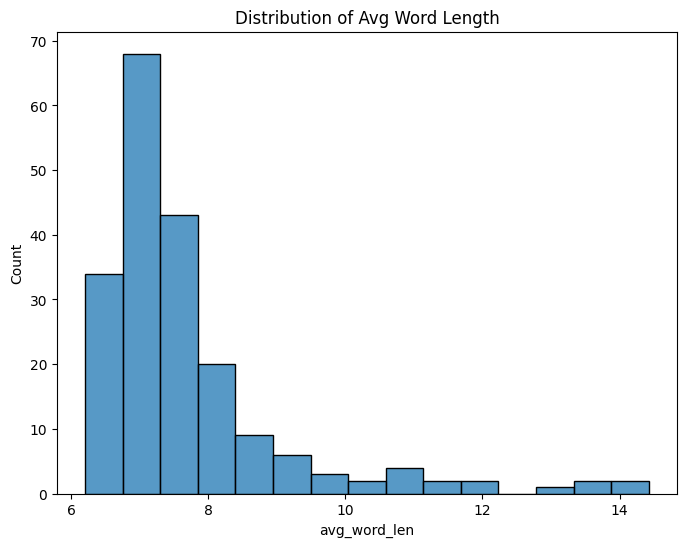

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(clean_resumes['avg_word_len'], bins=15);
plt.title('Distribution of Avg Word Length')
plt.show()

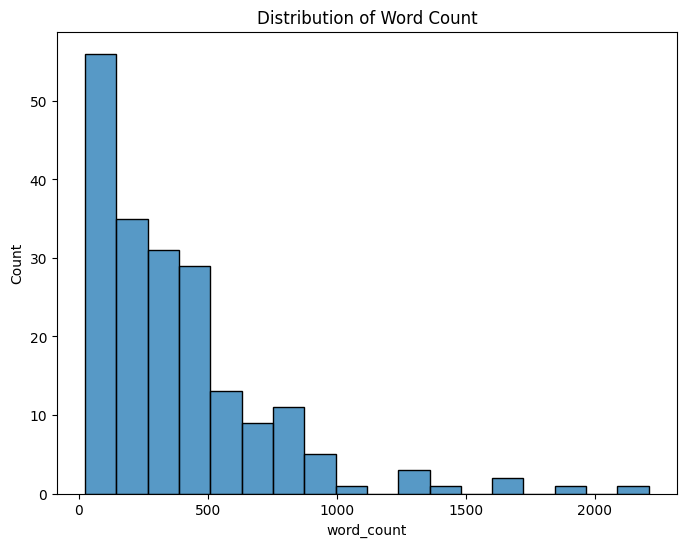

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(clean_resumes['word_count']);
plt.title('Distribution of Word Count')
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
def get_top_n_words(x, n):
  vec = CountVectorizer().fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [35]:
words = get_top_n_words(clean_resumes['content'], 50)

In [36]:
words

[('indeed', 672),
 ('year', 649),
 ('management', 629),
 ('project', 609),
 ('com', 564),
 ('download', 557),
 ('team', 542),
 ('experience', 521),
 ('application', 481),
 ('system', 452),
 ('skill', 439),
 ('testing', 421),
 ('microsoft', 420),
 ('work', 419),
 ('client', 401),
 ('test', 393),
 ('data', 385),
 ('service', 366),
 ('using', 366),
 ('in', 339),
 ('support', 321),
 ('https', 313),
 ('www', 313),
 ('co', 310),
 ('customer', 309),
 ('oracle', 303),
 ('tool', 300),
 ('business', 297),
 ('server', 296),
 ('technology', 291),
 ('process', 290),
 ('technical', 289),
 ('top', 287),
 ('software', 275),
 ('isid', 275),
 ('rex', 275),
 ('ikw', 275),
 ('report', 275),
 ('issue', 261),
 ('sap', 258),
 ('development', 255),
 ('engineer', 251),
 ('sql', 245),
 ('email', 233),
 ('information', 233),
 ('infosys', 230),
 ('knowledge', 227),
 ('worked', 223),
 ('requirement', 222),
 ('education', 219)]

In [37]:
df1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df1

,Unigram,Frequency
0,indeed,672
1,year,649
2,management,629
3,project,609
4,com,564
5,download,557
6,team,542
7,experience,521
8,application,481
9,system,452


/var/folders/mv/xvwhlwk10bn541grmg0wg4mh0000gn/T/ipykernel_12508/1478281034.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(df1['Unigram'], rotation=90)


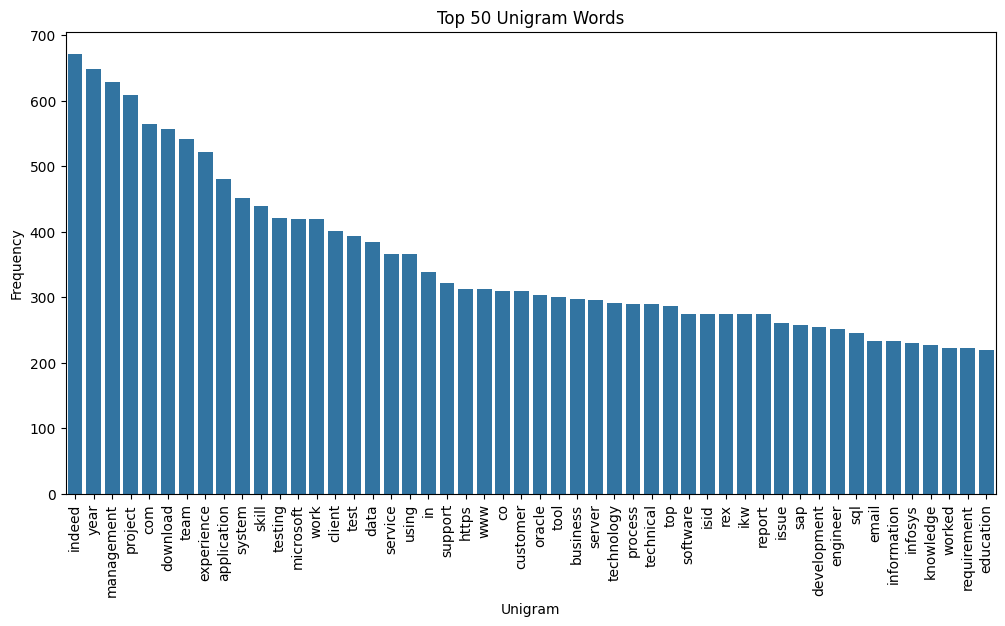

In [38]:
plt.figure(figsize = (12, 6))
g = sns.barplot(data = df1, x = 'Unigram', y = 'Frequency');
g.set_xticklabels(df1['Unigram'], rotation=90)
plt.title('Top 50 Unigram Words')
plt.show()


In [39]:
def get_top_n_words(x, n):
  vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [41]:
words = get_top_n_words(clean_resumes['content'], 50)
words

[('indeed com', 473),
 ('https www', 297),
 ('www indeed', 275),
 ('isid rex', 275),
 ('rex download', 275),
 ('download ikw', 275),
 ('ikw download', 275),
 ('download top', 275),
 ('top co', 275),
 ('co in', 275),
 ('work experience', 210),
 ('email indeed', 198),
 ('indeed indeed', 198),
 ('le year', 190),
 ('additional information', 139),
 ('bengaluru karnataka', 107),
 ('willing relocate', 86),
 ('infosys limited', 86),
 ('tamil nadu', 83),
 ('in https', 80),
 ('test case', 78),
 ('year additional', 69),
 ('system engineer', 66),
 ('sql server', 65),
 ('engineer infosys', 60),
 ('hyderabad telangana', 57),
 ('pune maharashtra', 56),
 ('team member', 55),
 ('karnataka email', 53),
 ('year experience', 53),
 ('pvt ltd', 53),
 ('operating system', 52),
 ('relocate to', 48),
 ('software engineer', 47),
 ('asp net', 47),
 ('project management', 42),
 ('microsoft office', 42),
 ('computer science', 41),
 ('information technical', 40),
 ('problem solving', 39),
 ('relocate anywhere', 37)

In [42]:
df2 = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
df2


,Bigram,Frequency
0,indeed com,473
1,https www,297
2,www indeed,275
3,isid rex,275
4,rex download,275
5,download ikw,275
6,ikw download,275
7,download top,275
8,top co,275
9,co in,275


/var/folders/mv/xvwhlwk10bn541grmg0wg4mh0000gn/T/ipykernel_12508/2610018800.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(df2['Bigram'], rotation=90)


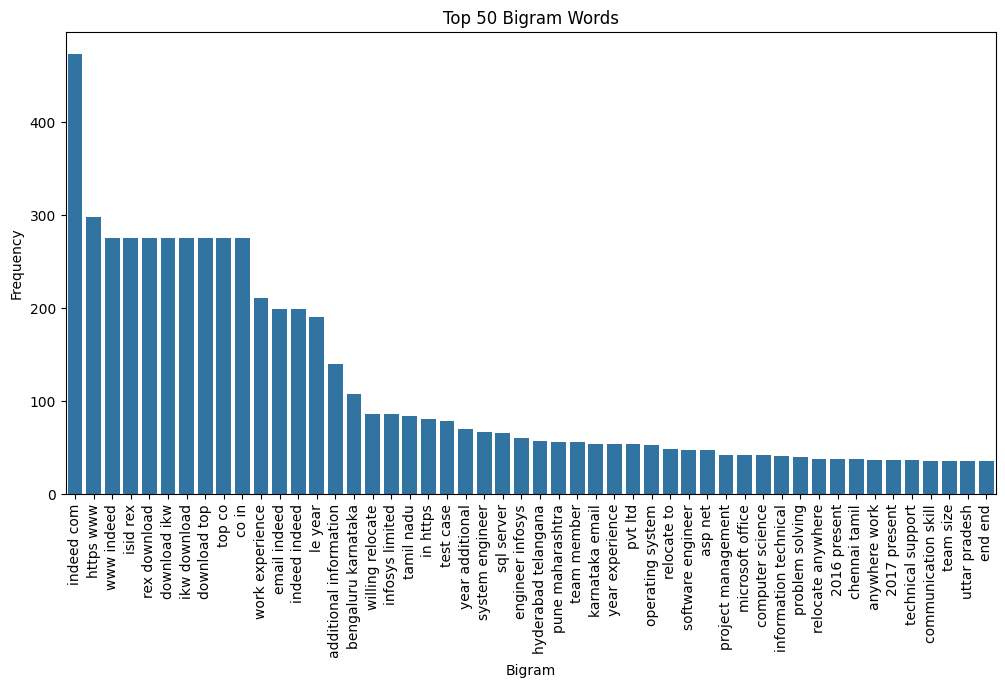

In [43]:
plt.figure(figsize = (12, 6))
g = sns.barplot(data = df2, x = 'Bigram', y = 'Frequency');
g.set_xticklabels(df2['Bigram'], rotation=90)
plt.title('Top 50 Bigram Words')
plt.show()

In [44]:
def get_top_n_words(x, n):
  vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [45]:
words = get_top_n_words(clean_resumes['content'], 50)
words

[('https www indeed', 275),
 ('www indeed com', 275),
 ('isid rex download', 275),
 ('rex download ikw', 275),
 ('download ikw download', 275),
 ('ikw download top', 275),
 ('download top co', 275),
 ('top co in', 275),
 ('email indeed indeed', 198),
 ('indeed indeed com', 198),
 ('co in https', 80),
 ('in https www', 78),
 ('year additional information', 69),
 ('karnataka email indeed', 53),
 ('willing relocate to', 48),
 ('system engineer infosys', 44),
 ('engineer infosys limited', 41),
 ('additional information technical', 40),
 ('willing relocate anywhere', 37),
 ('chennai tamil nadu', 37),
 ('le year additional', 37),
 ('relocate anywhere work', 36),
 ('anywhere work experience', 36),
 ('bengaluru karnataka email', 34),
 ('linkedin com in', 33),
 ('www linkedin com', 31),
 ('senior system engineer', 29),
 ('india pvt ltd', 28),
 ('maharashtra email indeed', 27),
 ('additional information skill', 26),
 ('telangana email indeed', 25),
 ('operating system window', 23),
 ('informatio

In [46]:
df3 = pd.DataFrame(words, columns = ['Trigram', 'Frequency'])
df3

,Trigram,Frequency
0,https www indeed,275
1,www indeed com,275
2,isid rex download,275
3,rex download ikw,275
4,download ikw download,275
5,ikw download top,275
6,download top co,275
7,top co in,275
8,email indeed indeed,198
9,indeed indeed com,198


/var/folders/mv/xvwhlwk10bn541grmg0wg4mh0000gn/T/ipykernel_12508/3225048002.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(df3['Trigram'], rotation=90)


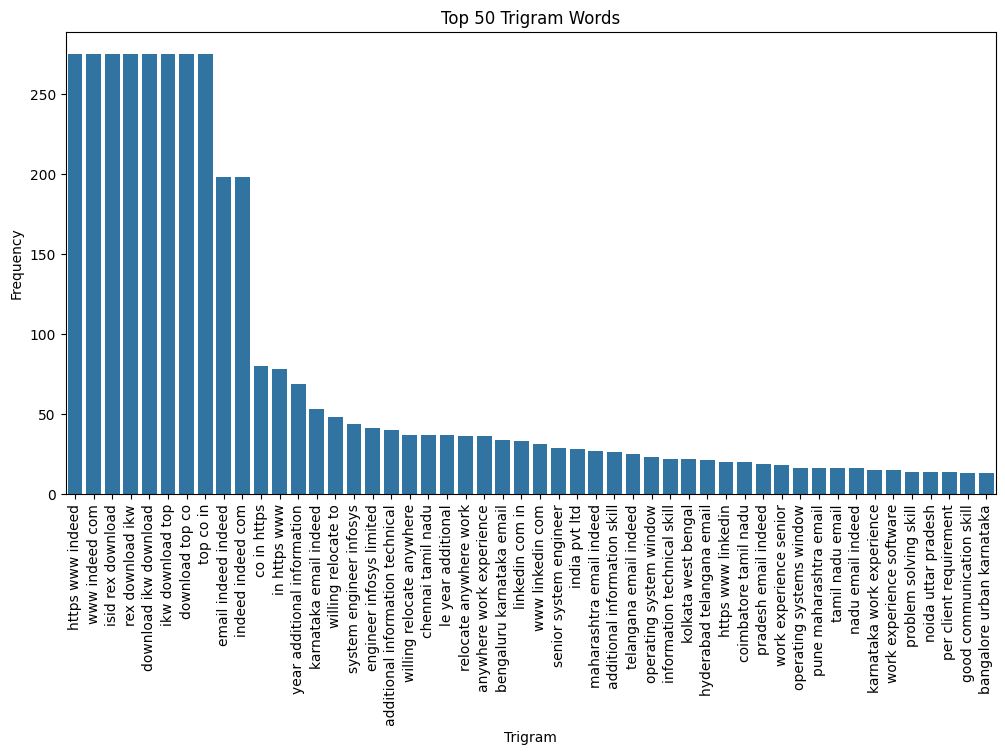

In [47]:
plt.figure(figsize = (12, 6))
g = sns.barplot(data = df3, x = 'Trigram', y = 'Frequency');
g.set_xticklabels(df3['Trigram'], rotation=90)
plt.title('Top 50 Trigram Words')
plt.show()

In [50]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
from textblob import TextBlob


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harshachaitanya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/harshachaitanya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/harshachaitanya/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [51]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [52]:
blob = TextBlob(str(clean_resumes['content']))
blob.tags

[('0', 'CD'),
 ('govardhana', 'NN'),
 ('k', 'NN'),
 ('senior', 'JJ'),
 ('software', 'NN'),
 ('engineer', 'NN'),
 ('bengalur', 'NN'),
 ('1', 'CD'),
 ('harini', 'NN'),
 ('komaravelli', 'JJ'),
 ('test', 'NN'),
 ('analyst', 'NN'),
 ('oracle', 'NN'),
 ('hyderab', 'NN'),
 ('2', 'CD'),
 ('hartej', 'NN'),
 ('kathuria', 'NNS'),
 ('data', 'NNS'),
 ('analyst', 'NN'),
 ('intern', 'JJ'),
 ('oracle', 'NN'),
 ('ret', 'NN'),
 ('3', 'CD'),
 ('ijas', 'JJ'),
 ('nizamuddin', 'JJ'),
 ('associate', 'NN'),
 ('consultant', 'NN'),
 ('state', 'NN'),
 ('str', 'NN'),
 ('4', 'CD'),
 ('imgeeyaul', 'NN'),
 ('ansari', 'NN'),
 ('java', 'NN'),
 ('developer', 'NN'),
 ('pune', 'NN'),
 ('maharasht', 'NN'),
 ('195', 'CD'),
 ('mansi', 'NN'),
 ('thanki', 'NN'),
 ('student', 'NN'),
 ('jamnagar', 'NN'),
 ('gujarat', 'NN'),
 ('email', 'NN'),
 ('in', 'IN'),
 ('196', 'CD'),
 ('anil', 'JJ'),
 ('kumar', 'NN'),
 ('microsoft', 'JJ'),
 ('azure', 'NN'),
 ('basic', 'JJ'),
 ('management', 'NN'),
 ('de', 'NN'),
 ('197', 'CD'),
 ('siddhart

In [53]:
pos_df = pd.DataFrame(blob.tags, columns = ['words', 'pos'])
pos_df.head()

,words,pos
0,0,CD
1,govardhana,NN
2,k,NN
3,senior,JJ
4,software,NN


In [54]:
pos_df = pos_df['pos'].value_counts()
pos_df

pos
NN     51
JJ     12
CD     11
NNS     2
IN      1
NNP     1
Name: count, dtype: int64

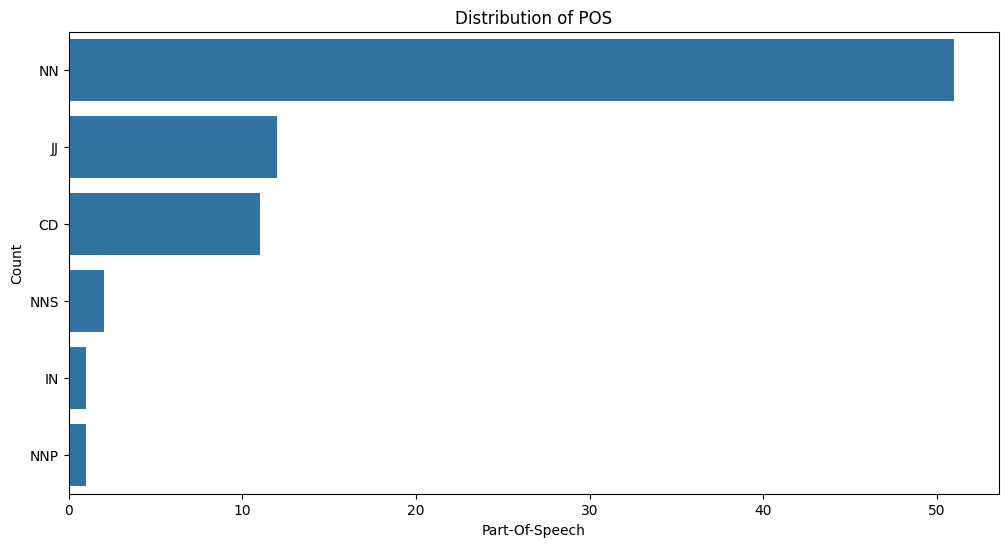

In [63]:
plt.figure(figsize = (12, 6))
sns.barplot(x = pos_df.values, y = pos_df.index, orient='h')
labels = list(pos_df.index)
labels.reverse()
plt.title('Distribution of POS')
plt.ylabel('Count')
plt.xlabel('Part-Of-Speech')
plt.show()